<a href="https://colab.research.google.com/github/felipe-mazzi/results-analysis/blob/main/LiNbO3_Post_Etch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This piece of code is intended to read, analyse and plot data from a surface profiler.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
#glob is a pack

In [16]:
from google.colab import drive
drive.mount('/content/drive')
path_dados = '/content/drive/Shareddrives/MS - Felipe Boechat Mazzi/Projects/Project 9 - LiNbO3 Chips Post-Etch/Dados/'

# Here I import data into a dataframe, using tabs as separators
icp_data = pd.read_csv(path_dados +'ICP data.txt', sep = "\t")

# Next I will sort the dataset by the 'sample' column, ignoring the indexes so that
icp_data = icp_data.sort_values('sample',ignore_index=True)
icp = icp_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
icp_data

,sample,RIE power (W),ICP power (W),massflow (sccm),pressure (mTor),Temp. (Celcius),etching time (min),av. Bias (V),Range (V)
0,A,10,10,5,5,60,2,0.0,0
1,AA,250,10,50,9,25,2,730.0,0
2,AB,250,10,50,100,25,2,620.0,0
3,AC,250,1250,5,5,25,2,395.0,0
4,AD,250,1250,5,100,25,2,354.0,0
5,AE,250,1250,50,7,25,2,404.0,0
6,AF,250,1250,50,100,25,2,352.0,0
7,B,10,10,5,100,60,2,59.0,0
8,C,10,10,50,9,60,2,0.0,0
9,D,10,10,50,100,60,2,69.0,0


In [19]:
names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD',"Control"]
forbidden = ['A','C','P','AA']

# A, C, N, P, U, AA AND AC WERE EXCLUDED BECAUSE OF ACTUAL EXPERIMENTAL DIFFICULTIES
# B AND J ARE SIMPLY PRESENTING TROUBLE FOR THE PROGRAM, SO I SHOULD PLUG THEM BACK INTO THE PROCESS ONCE I HAVE FIGURED THINGS OUT

names = [x for x in names if x not in forbidden]
samples = []
 
N = len(names)

for j in range(N):
    if names[j] == 'B':
      df = pd.read_csv(path_dados + names[j] + '.csv', skiprows = 20, encoding = 'ascii', encoding_errors = 'ignore',index_col=False, names=['position(um)','height(angs)'])
      samples.append(df)
    else:
      df = pd.read_csv(path_dados + names[j] + '.csv', skiprows = 20, encoding = 'ascii', encoding_errors = 'ignore',index_col=False, names=['position(um)','height(angs)'])
      samples.append(df)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


B


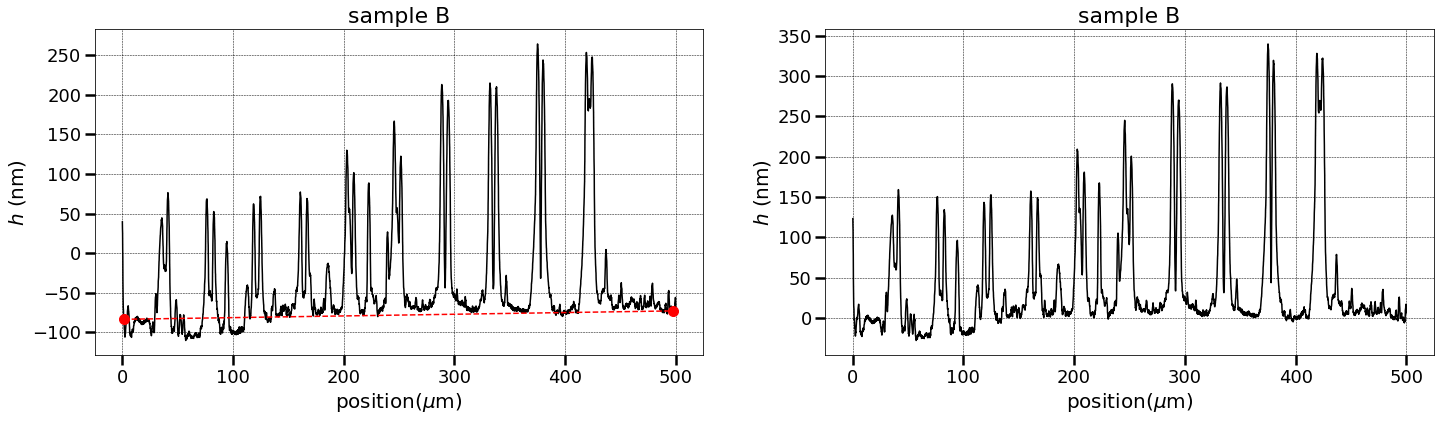

D


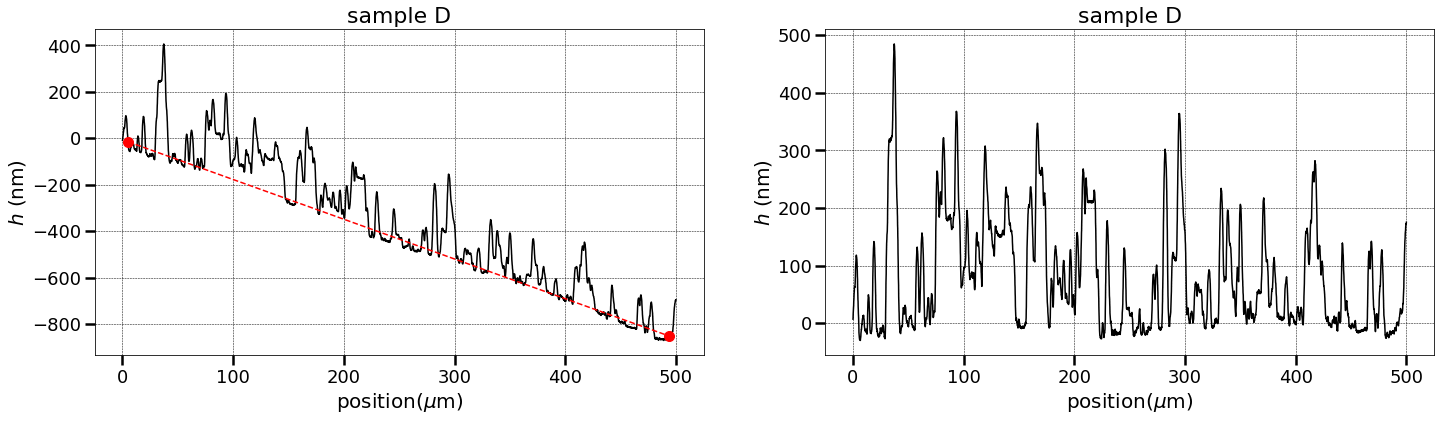

E


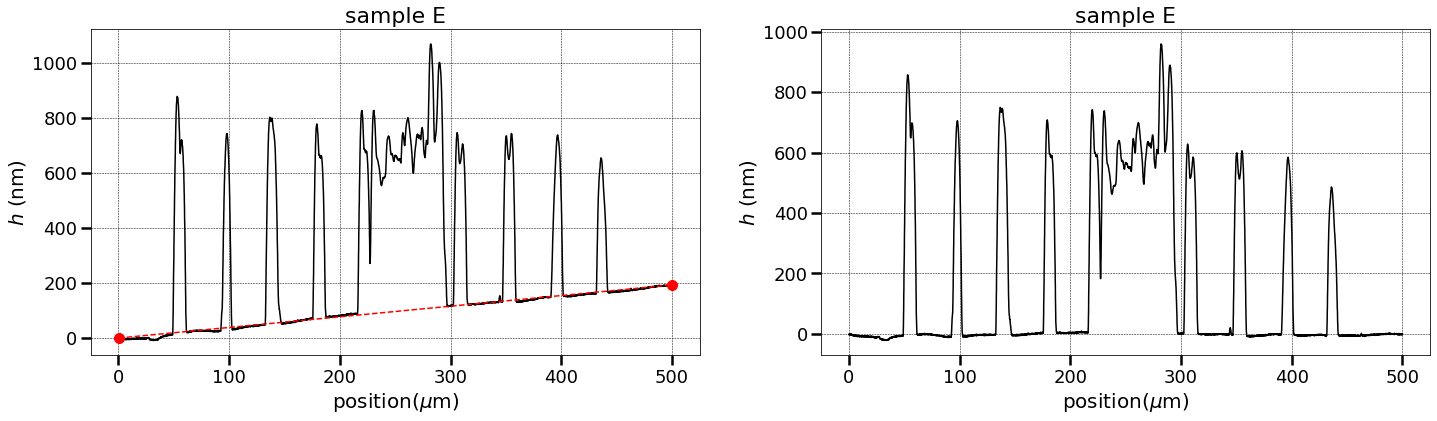

F


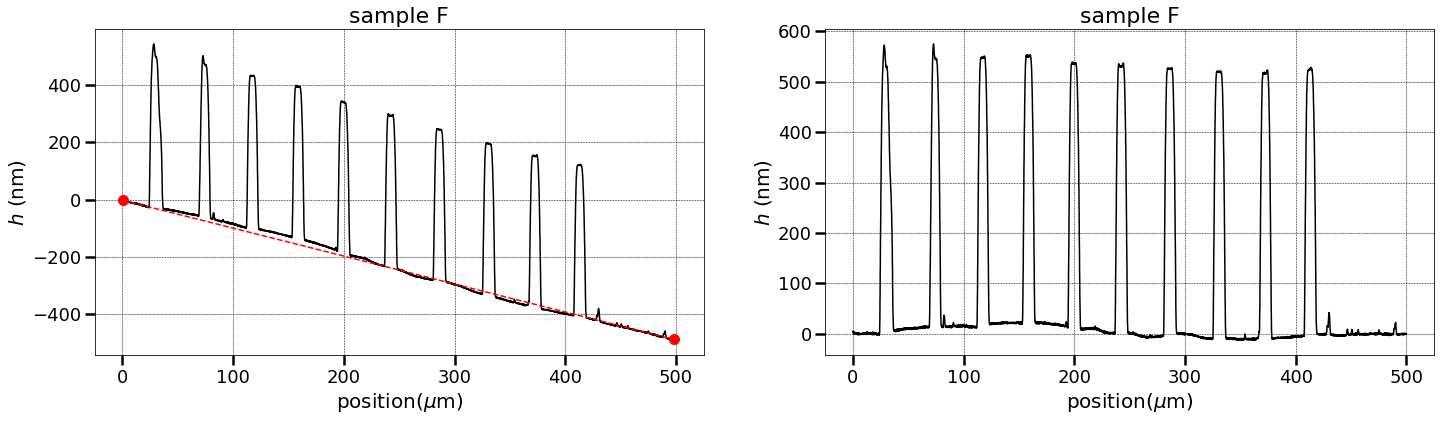

G


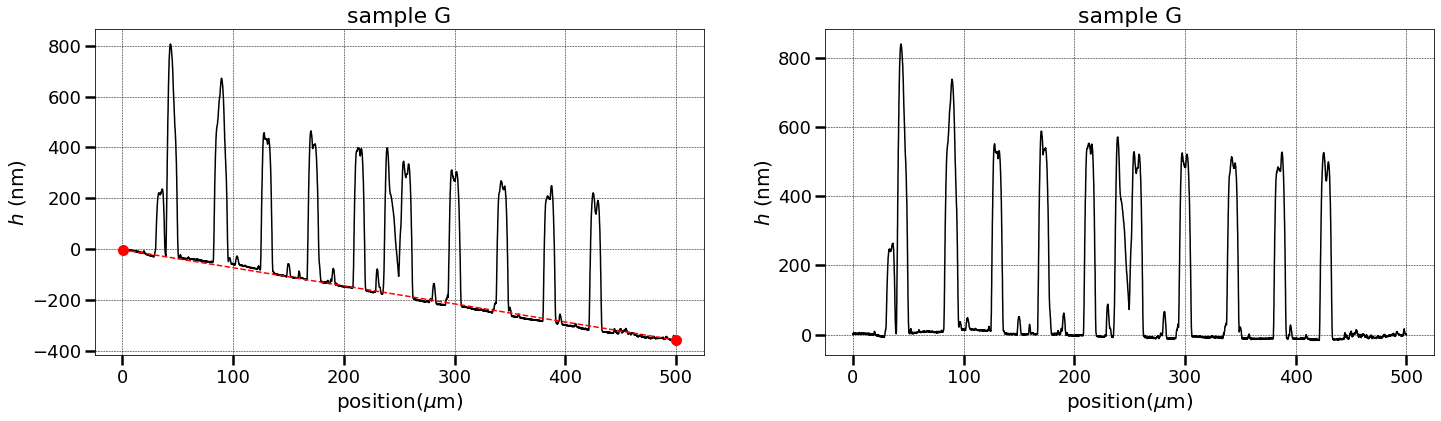

H


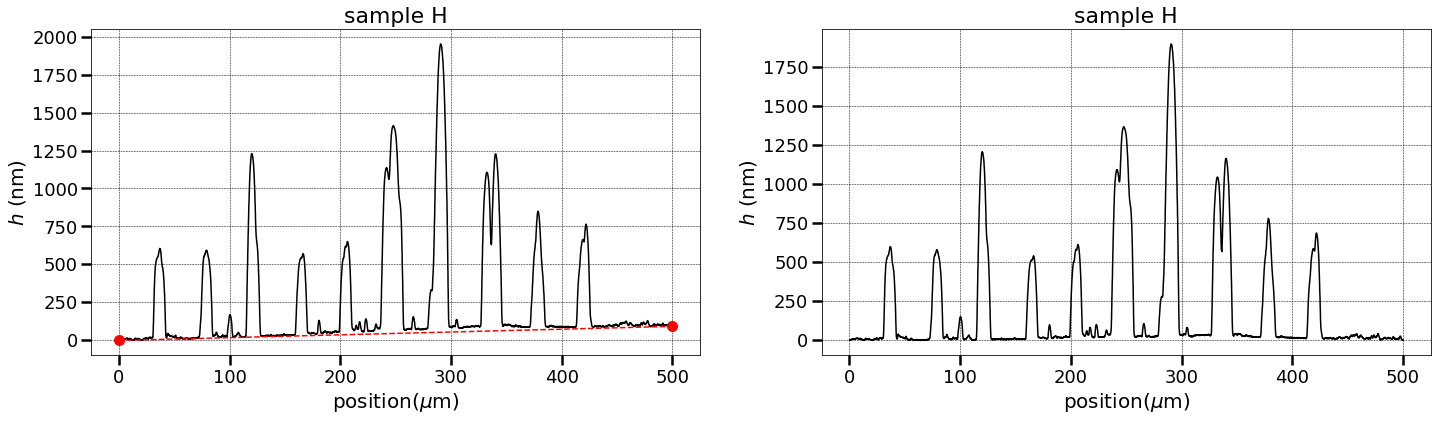

I


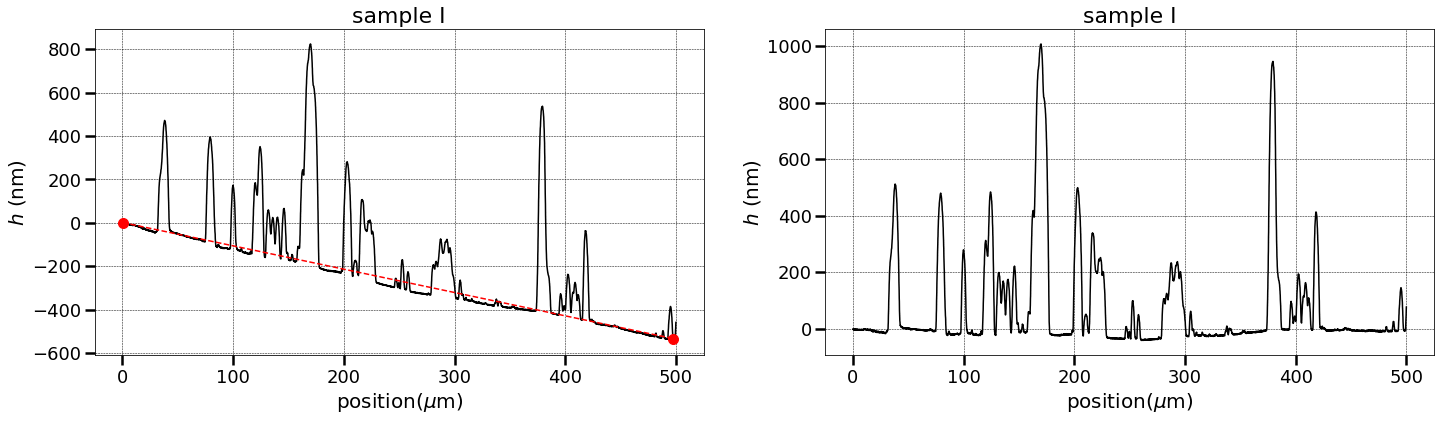

J


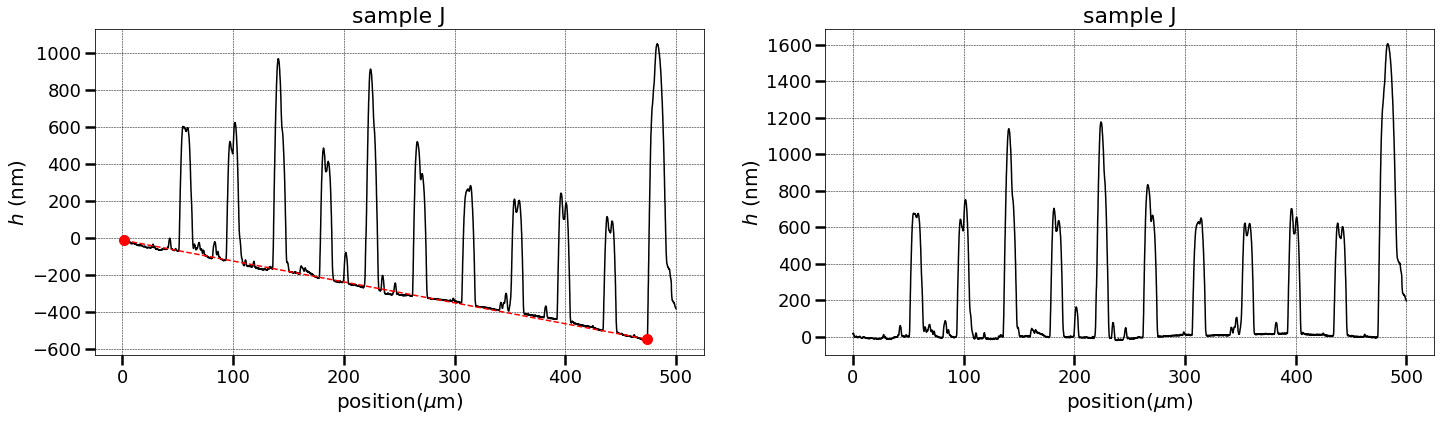

K


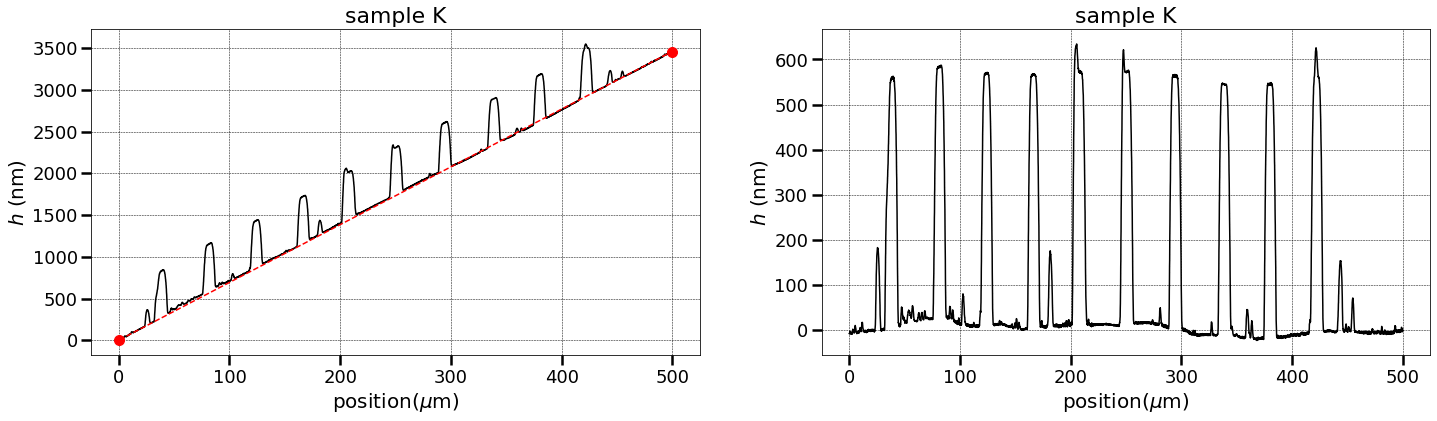

L


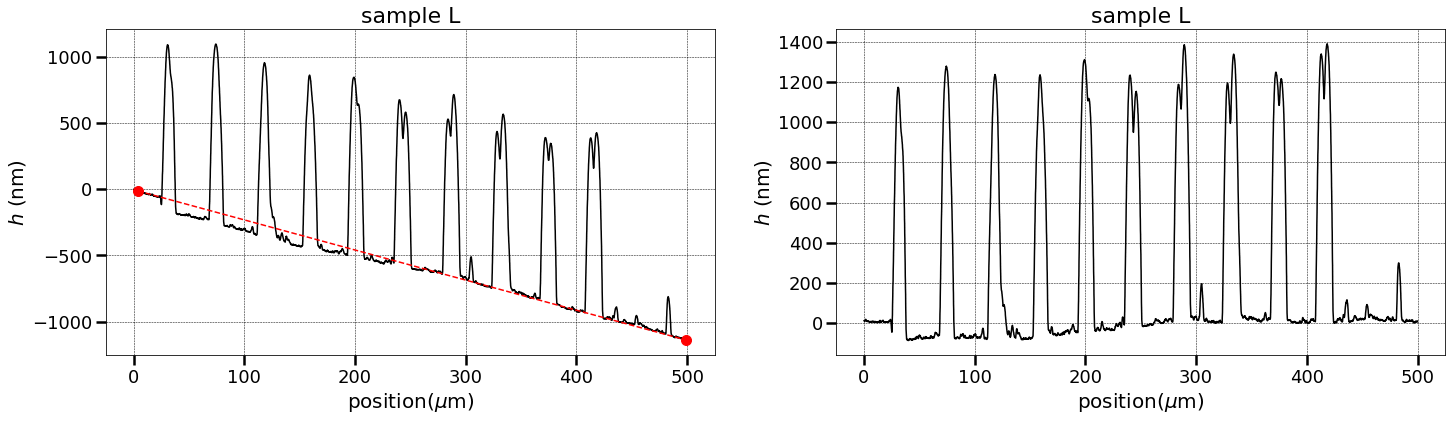

M


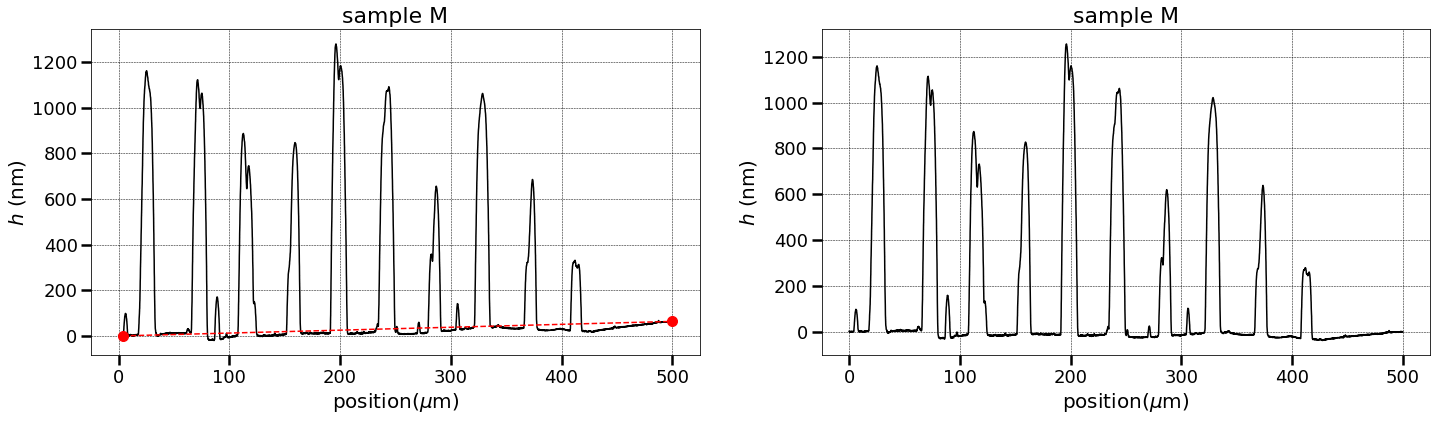

N


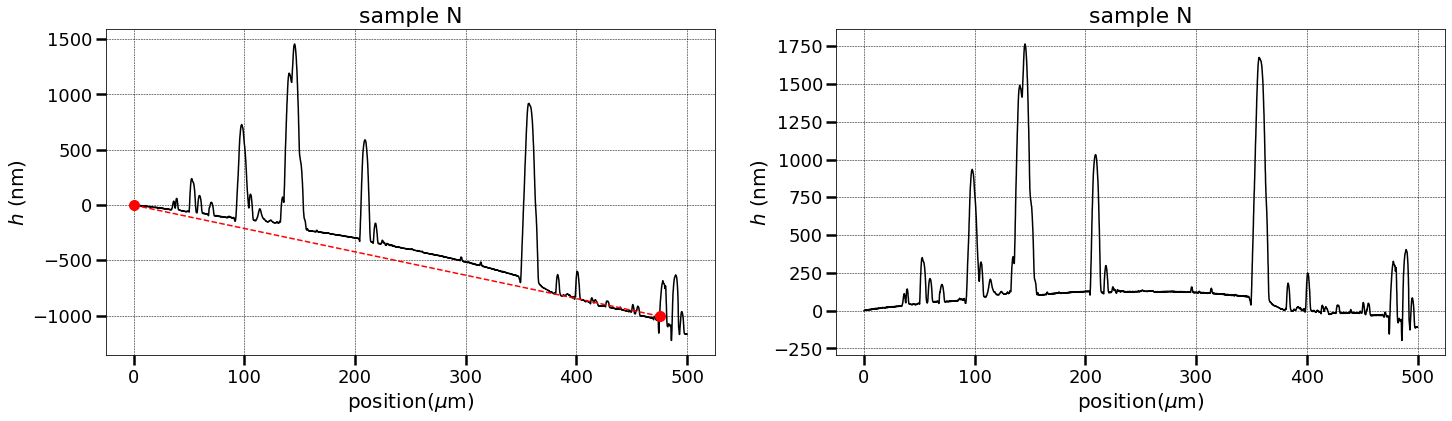

O


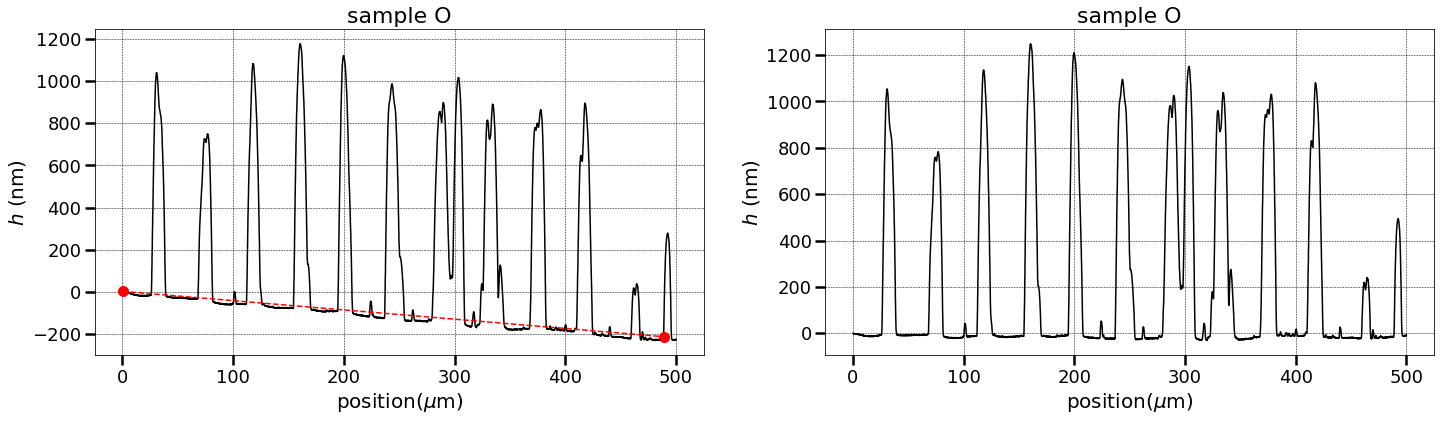

Q


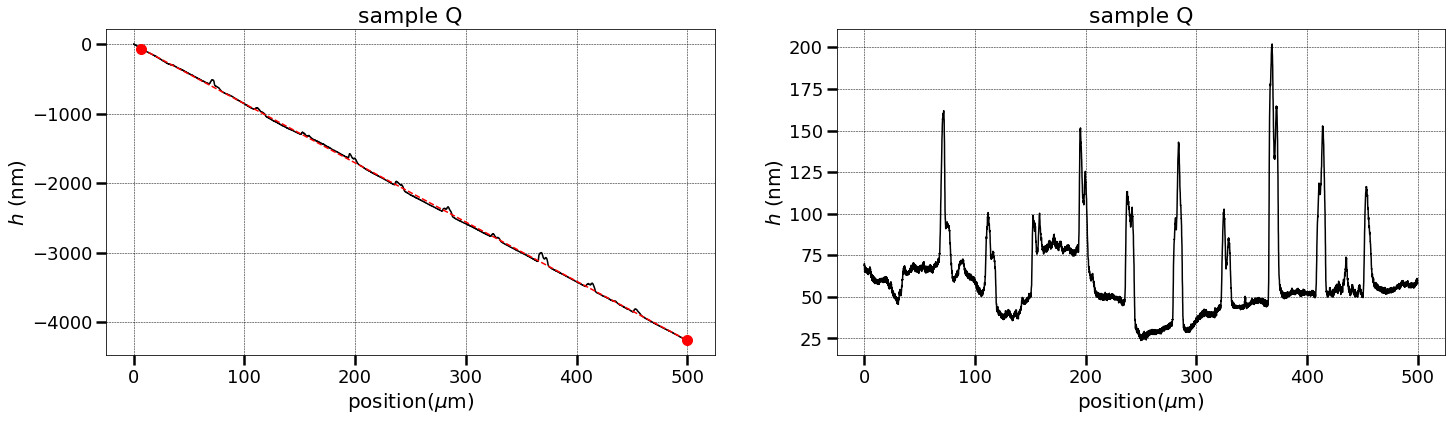

R


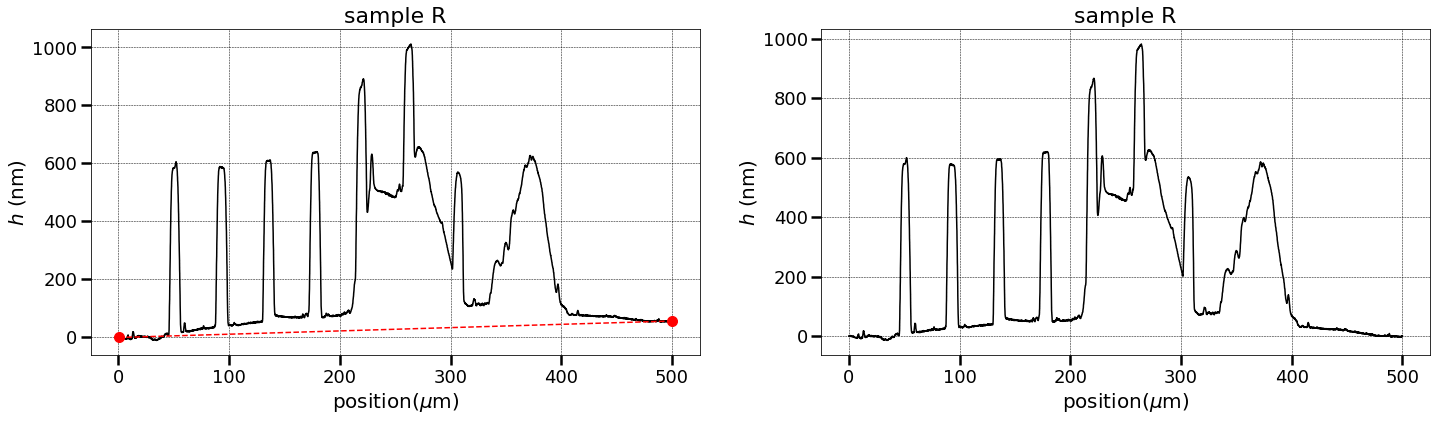

S


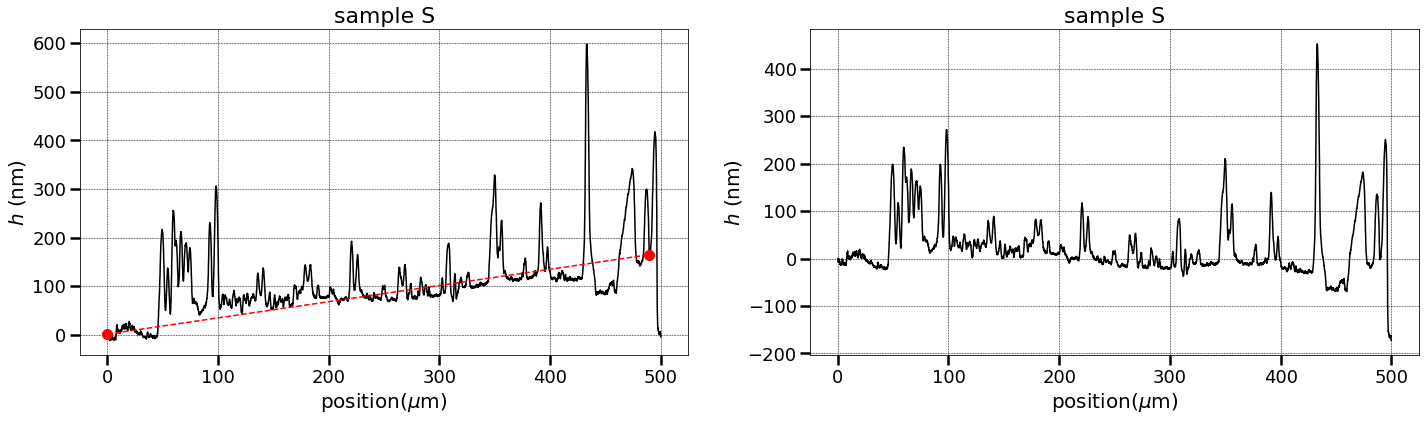

T


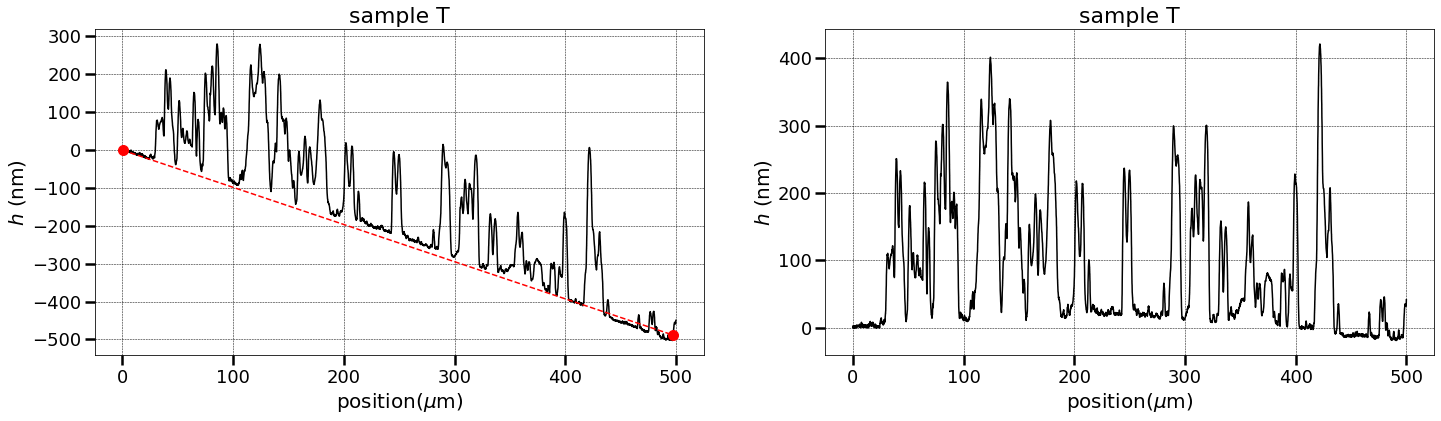

U


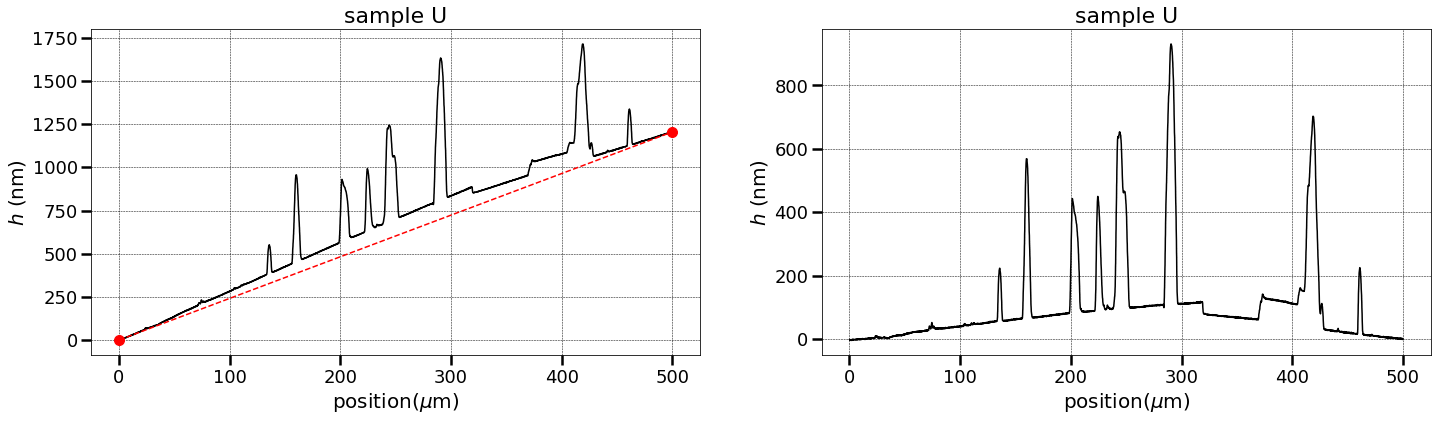

V


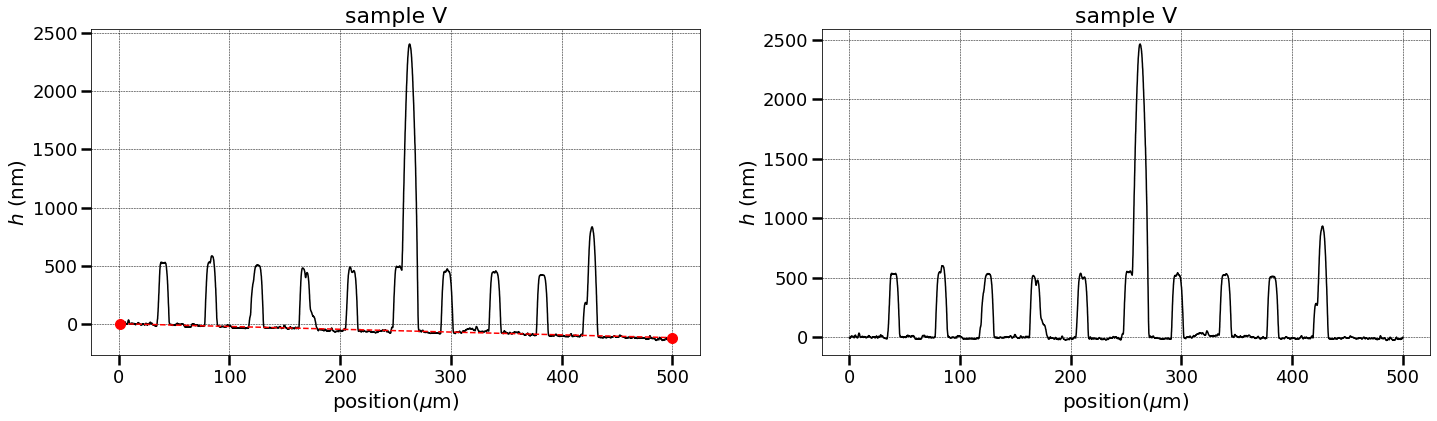

W


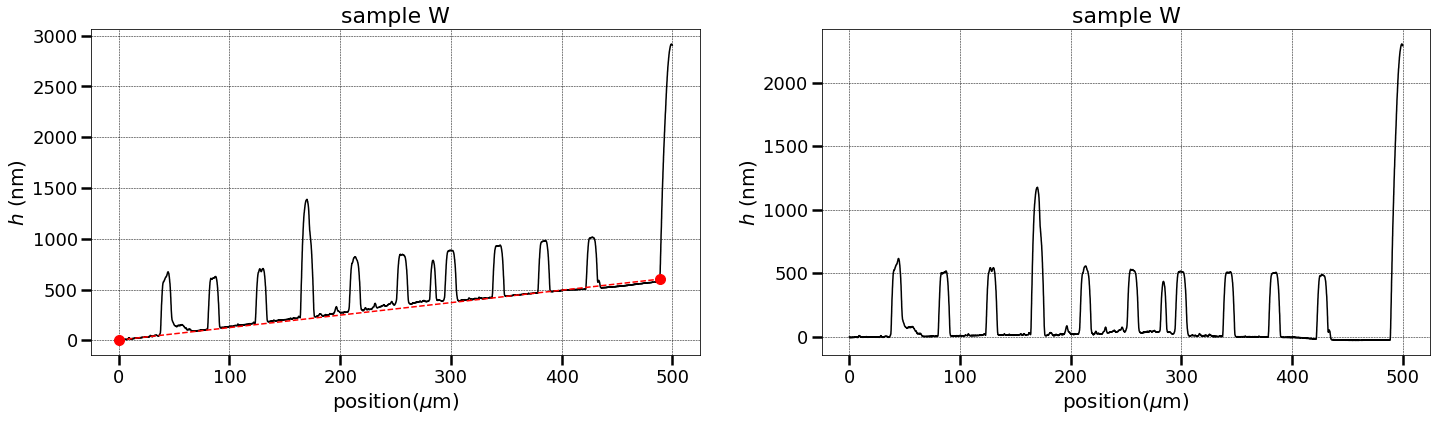

X


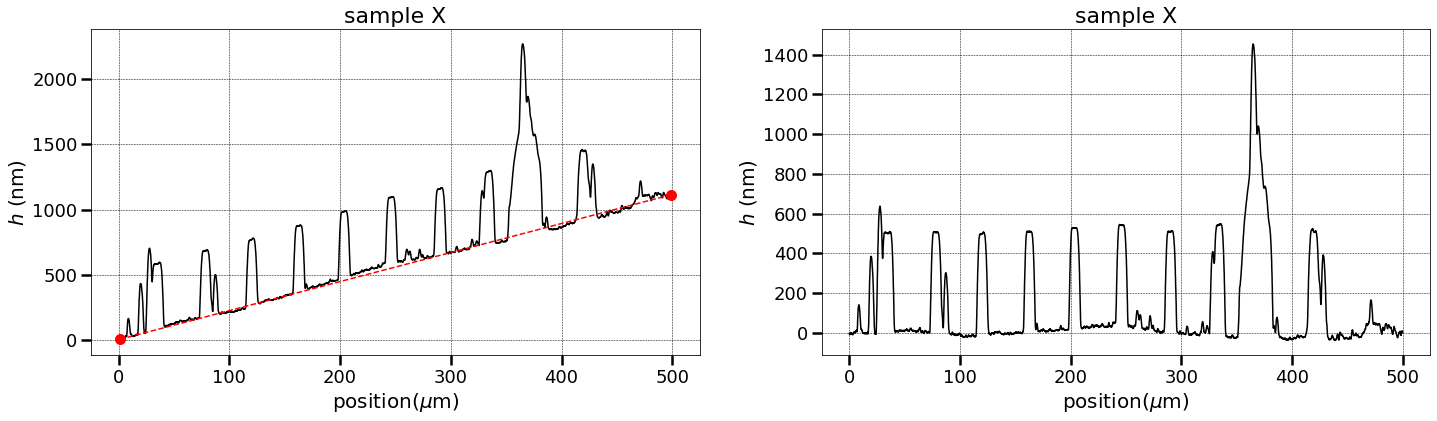

Y
ponto 1: 447 , ponto 2: -2 dh: 259.2999999999993 degen: step: 192.3 max:  659.308


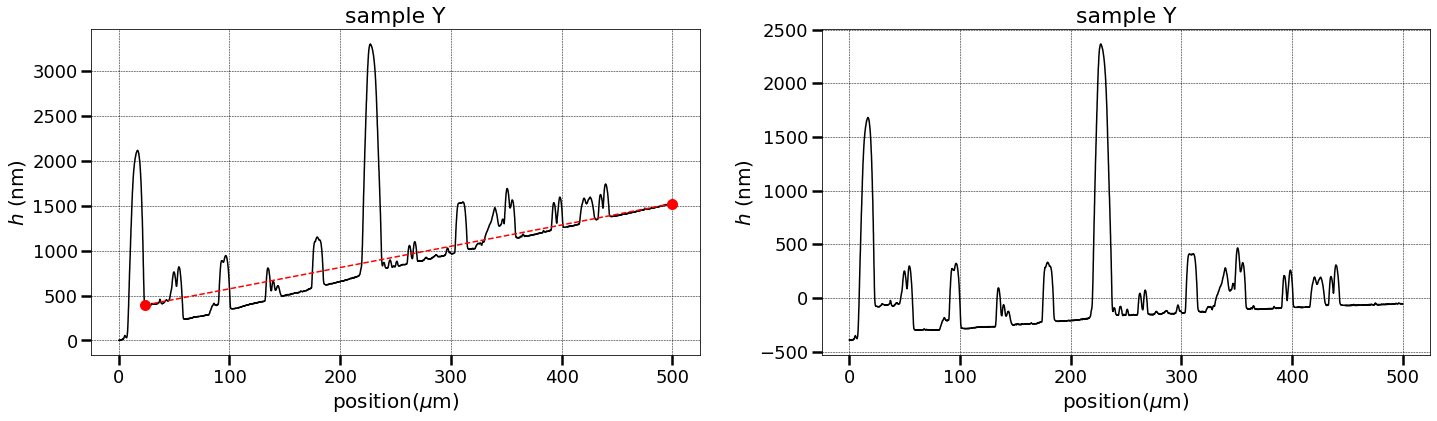

Z


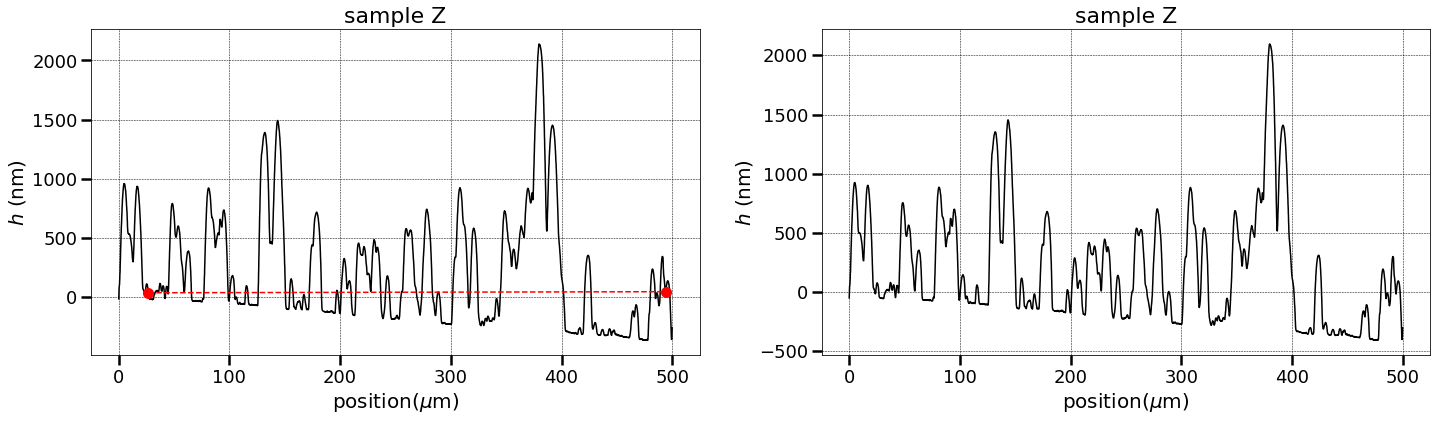

AB


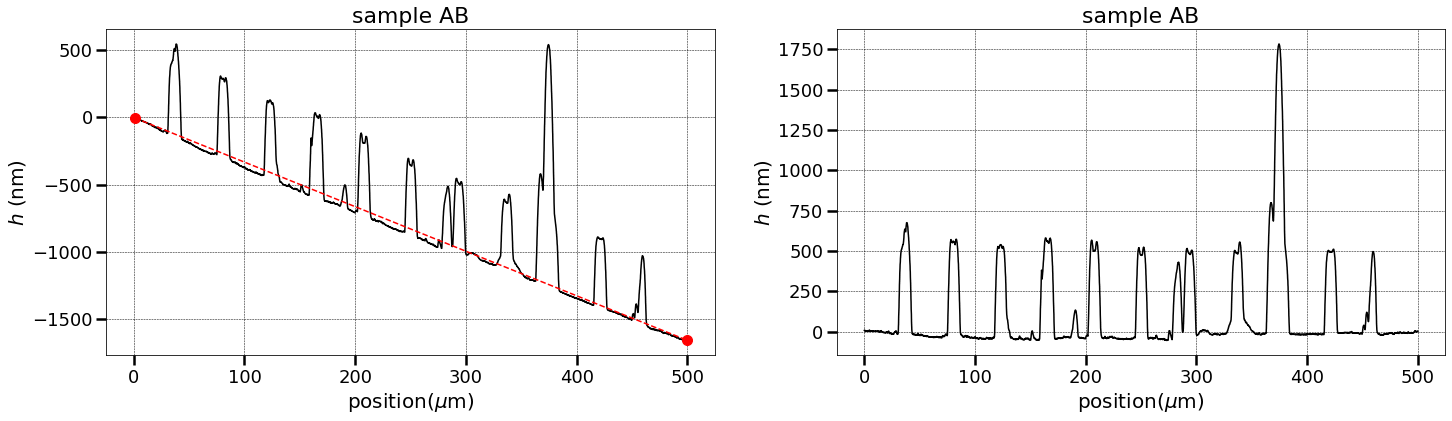

AC


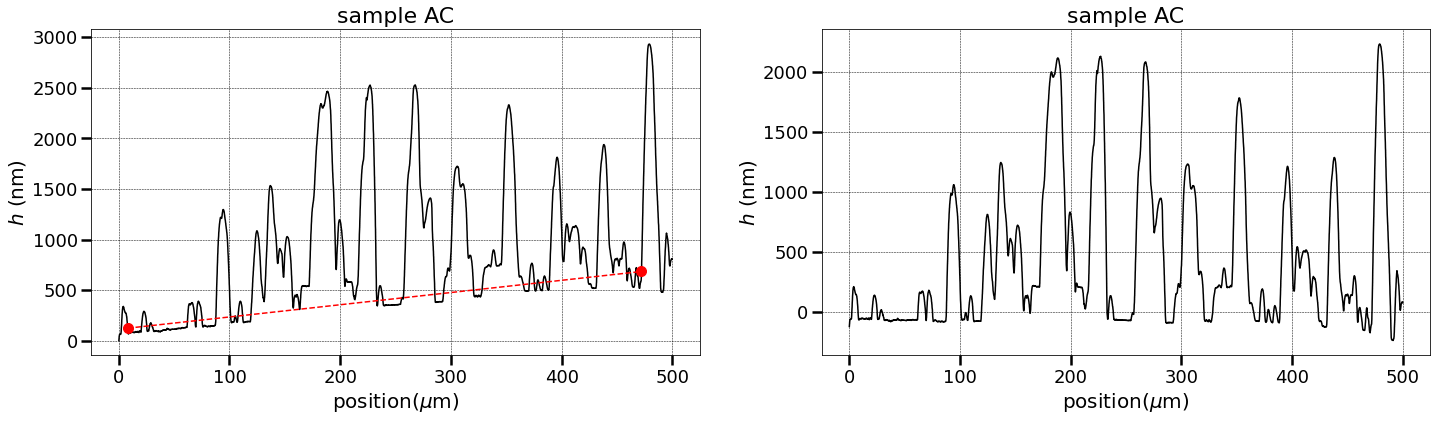

AD


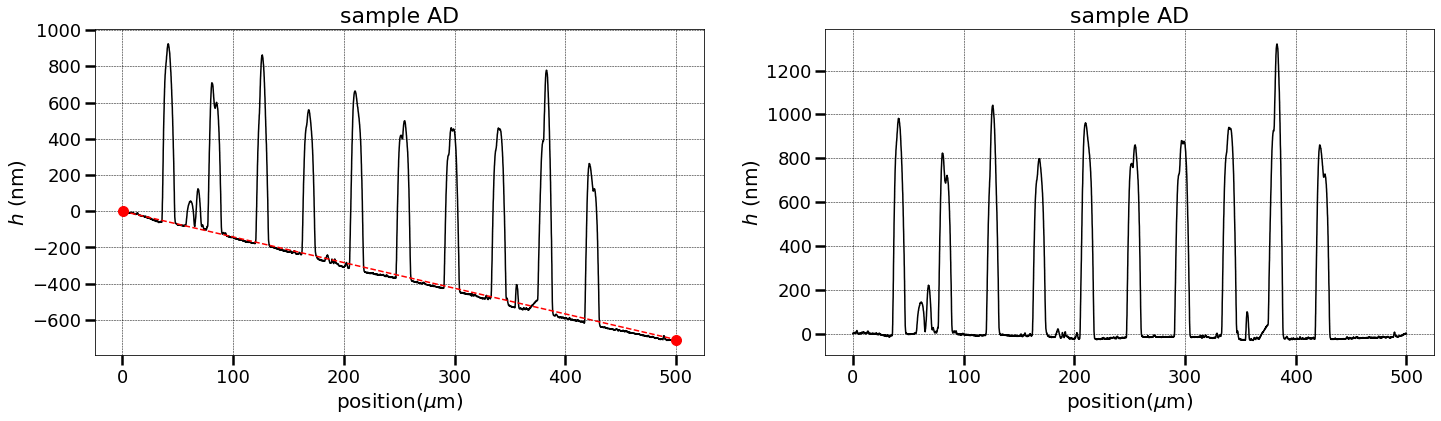

Control


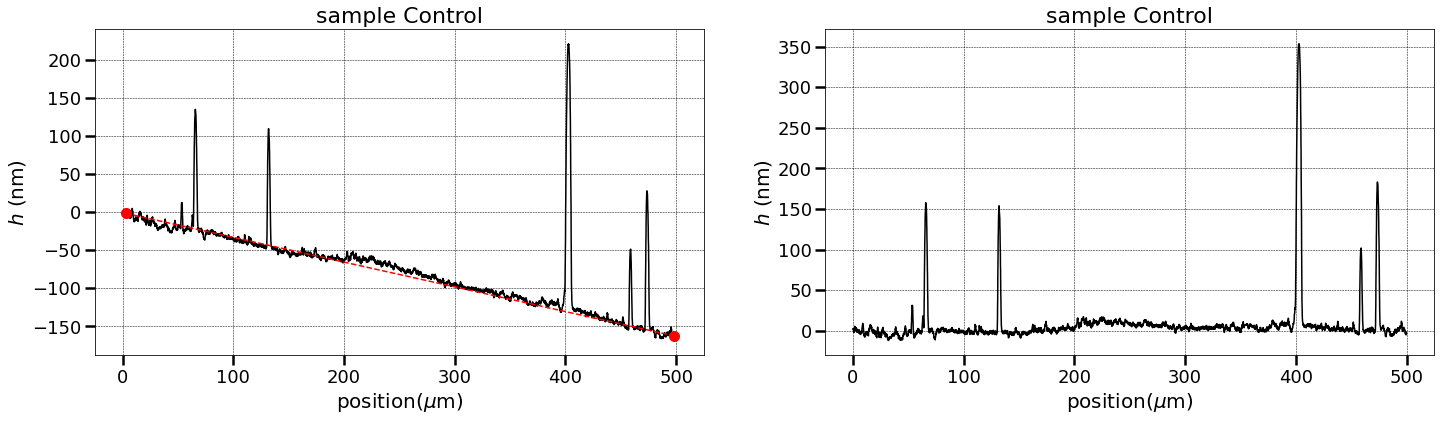

In [20]:
nth = 0
for sample in samples:
  label = names[nth]
  print(label)
  nth = nth+1
  max = abs(sample['height(angs)']).max()
  resolution = 5.2e-8
  length = 500e-6
  n_of_points = length/resolution
  scan_step = 0.02*int(n_of_points)
  scale_tolerance = 0.02*max
  pos_step = 0.02*length
  col=sample['height(angs)']
  pos=sample['position(um)']

  mid_check = 1.2

  dh = 10**9*scale_tolerance
  check = 10**9*mid_check

  i=0
  while dh > scale_tolerance or check > mid_check:
    dh = abs(col.iloc[i] - col.iloc[i + int(scan_step)])
    check = abs(col.iloc[i] - col.iloc[i + int(0.5*scan_step)])/dh
    i=i+1
    a = i
  
  dh = 10**9*scale_tolerance
  check = 10**9*mid_check
  i=0
  while dh > scale_tolerance or check > mid_check:
    dh = abs(col.iloc[-i] - col.iloc[-i - int(scan_step)])
    check = abs(col.iloc[-i] - col.iloc[-i - int(0.5*scan_step)])/dh
    i=i+1
    b = -i 
  

  if label == 'Y':
    print('ponto 1:', a, ', ponto 2:', b, 'dh:', dh, 'degen:', 'step:', scan_step, 'max: ', scale_tolerance)
  
  alpha = (sample.iloc[b,1]-sample.iloc[a,1])/(sample.iloc[b,0]-sample.iloc[a,0])
  beta = sample.iloc[a,1]

  fig = plt.figure(figsize=(24,6))
  ax1 = plt.subplot(1, 2, 1)
  plt.xticks(fontsize = 18)#,fontweight='bold')
  plt.yticks(fontsize = 18)#,fontweight='bold')
  #eixo.yaxis.set_minor_locator(plt.MultipleLocator(2))
  plt.tick_params(axis='both',which='minor',length=5,width=1)
  plt.tick_params(axis='both',which='major',length=10,width=2.5)
  plt.grid(True,color='black', linestyle='--', linewidth=0.5)


  ax2 = plt.subplot(1, 2, 2)
  plt.xticks(fontsize = 18)#,fontweight='bold')
  plt.yticks(fontsize = 18)#,fontweight='bold')
  #eixo.yaxis.set_minor_locator(plt.MultipleLocator(2))
  plt.tick_params(axis='both',which='minor',length=5,width=1)
  plt.tick_params(axis='both',which='major',length=10,width=2.5)
  plt.grid(True,color='black', linestyle='--', linewidth=0.5)

  ax1.set_title('sample' + ' ' + label,fontsize = 22)
  ax1.set_ylabel(r'$h$ (nm)',fontsize = 20)
  ax1.set_xlabel('position'+r'($\mu$m)',fontsize = 20)

  ax2.set_title('sample' + ' ' + label,fontsize = 22)
  ax2.set_ylabel(r'$h$ (nm)',fontsize = 20)
  ax2.set_xlabel('position'+r'($\mu$m)',fontsize = 20)
  
  ax1.plot(sample['position(um)'],sample['height(angs)']/10, marker='o',markersize=0.01,color='black')
  ax1.plot([sample.iloc[a,0],sample.iloc[b,0]],[sample.iloc[a,1]/10,sample.iloc[b,1]/10],linestyle='--',marker='o',markersize=10,color='red')

  ax2.plot(sample['position(um)'],(sample['height(angs)']-(alpha*sample['position(um)']+beta))/10, marker='o',markersize=0.01,color='black')

  images_dir = '/content/drive/Shareddrives/MS - Felipe Boechat Mazzi/Projects/Project 9 - LiNbO3 Chips Post-Etch/Dados/Gráficos'
  plt.savefig(f"{images_dir}/sample{label}.png")

  plt.show()


In [ ]:
samples[18].iloc[435+int(192)]

position(um)      32.8
height(angs)    4059.9
Name: 627, dtype: float64

In [ ]:
samples[18].iloc[435]


position(um)      22.8
height(angs)    5320.0
Name: 435, dtype: float64

In [ ]:
icp_data[icp_data['sample']=='C']

,sample,RIE power (W),ICP power (W),massflow (sccm),pressure (mTor),Temp. (Celcius),etching time (min),av. Bias (V),Range (V)
8,C,10,10,50,9,60,2,0.0,0


In [ ]:
def f(x = 5): return x + 2

In [ ]:
f()

7